In [77]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as itg
plt.rc('text', usetex=True)

In [81]:
x, A, chi = sp.symbols(r'x, A, \chi', real=True)
kappa = sp.symbols(r'\kappa', real=True)
psi = sp.exp(-kappa*x)*(3*sp.tanh(chi-x)**2 + kappa**2 - 1 + 3*kappa*sp.tanh(chi-x))
psi

(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x)

In [82]:
def V(y):
    return (y**2 - 1)**2/2

phi = sp.tanh(x + chi) + A*psi
energy_density = (phi.diff(x)**2/2 + V(phi)) #.expand()
energy_density

((A*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + tanh(\chi + x))**2 - 1)**2/2 + (-A*\kappa*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + A*(3*\kappa*(tanh(\chi - x)**2 - 1) + 3*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - x))*exp(-\kappa*x) - tanh(\chi + x)**2 + 1)**2/2

In [28]:
H = sp.symbols('H')
k = -3*H/2 - sp.sqrt(1 - 3*H**2/4)
X = sp.atanh(H)

In [29]:
func = sp.lambdify((x, H, A), energy_density.subs({chi:X, kappa:k}))

(-10.0, 0.0)

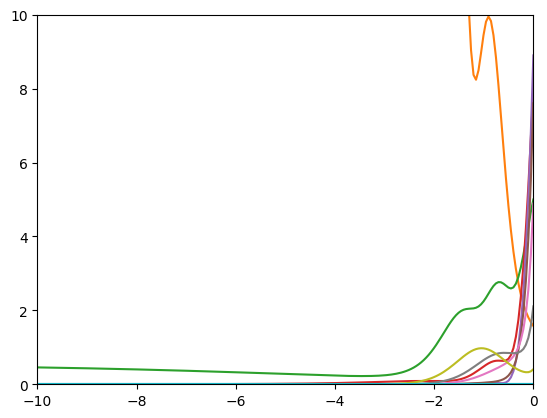

In [33]:
x = np.linspace(-10, 0, 200)
for H in np.linspace(-1, 1, 10):
    plt.plot(x, func(x, H, 1))
plt.ylim(0, 10)
plt.xlim(x.min(), x.max())

In [75]:
x = np.linspace(-200, 0, 200)
Hs = np.linspace(-1, 1, 200)
As = np.linspace(0, 1, 6)[1:]
Es = []
for A in As:
    Es.append([itg.quad(lambda x0: func(x0, H, A), x.min(), x.max())[0] for H in Hs])

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in arctanh
  return (1/2)*((A*((-3/2*H - sqrt(1 - 3/4*H**2))**2 - 3*(-3/2*H - sqrt(1 - 3/4*H**2))*tanh(x - arctanh(H)) + 3*tanh(x - arctanh(H))**2 - 1)*exp(-x*(-3/2*H - sqrt(1 - 3/4*H**2))) + tanh(x + arctanh(H)))**2 - 1)**2 + (1/2)*(-A*(-3/2*H - sqrt(1 - 3/4*H**2))*((-3/2*H - sqrt(1 - 3/4*H**2))**2 - 3*(-3/2*H - sqrt(1 - 3/4*H**2))*tanh(x - arctanh(H)) + 3*tanh(x - arctanh(H))**2 - 1)*exp(-x*(-3/2*H - sqrt(1 - 3/4*H**2))) + A*(3*(-3/2*H - sqrt(1 - 3/4*H**2))*(tanh(x - arctanh(H))**2 - 1) - 3*(2*tanh(x - arctanh(H))**2 - 2)*tanh(x - arctanh(H)))*exp(-x*(-3/2*H - sqrt(1 - 3/4*H**2))) - tanh(x + arctanh(H))**2 + 1)**2
<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in scalar power
  return (1/2)*((A*((-3/2*H - sqrt(1 - 3/4*H**2))**2 - 3*(-3/2*H - sqrt(1 - 3/4*H**2))*tanh(x - arctanh(H)) + 3*tanh(x - arctanh(H))**2 - 1)*exp(-x*(-3/2*H - sqrt(1 - 3/4*H**2))) + tanh(x + arctanh(H)))**2 - 1)**2 + (1/2)*(-A*(-3/

In [90]:
-1/np.sqrt(3)

-0.5773502691896258

Text(0, 0.5, '$E[\\phi_K(x) + A\\psi(x)]$')

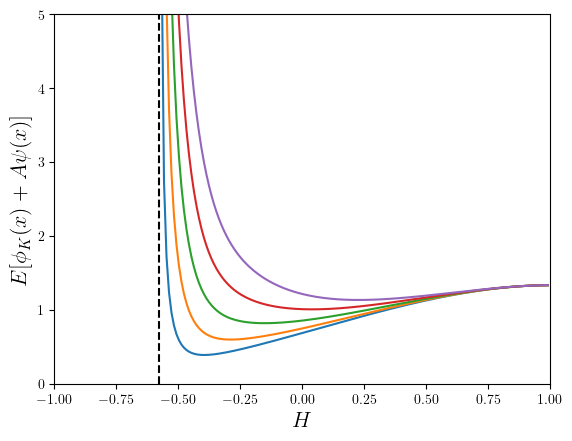

In [106]:
for E in Es:
    plt.plot(Hs[:-1], E[:-1])
plt.ylim(0, 5)
plt.xlim(Hs.min(), 1)
plt.axvline(-1/np.sqrt(3), ls='--', c='k')
plt.xlabel(r'$H$', fontsize=16)
plt.ylabel(r'$E[\phi_K(x) + A\psi(x)]$', fontsize=16)
# plt.plot([1], [4/3], 'wo', clip_on=False, markeredgecolor='k', markersize=7)

In [83]:
energy_density.diff(x)

(A*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + tanh(\chi + x))*((A*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + tanh(\chi + x))**2 - 1)*(-2*A*\kappa*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + 2*A*(3*\kappa*(tanh(\chi - x)**2 - 1) + 3*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - x))*exp(-\kappa*x) - 2*tanh(\chi + x)**2 + 2) + (-A*\kappa*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) + A*(3*\kappa*(tanh(\chi - x)**2 - 1) + 3*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - x))*exp(-\kappa*x) - tanh(\chi + x)**2 + 1)*(2*A*\kappa**2*(\kappa**2 + 3*\kappa*tanh(\chi - x) + 3*tanh(\chi - x)**2 - 1)*exp(-\kappa*x) - 4*A*\kappa*(3*\kappa*(tanh(\chi - x)**2 - 1) + 3*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - x))*exp(-\kappa*x) + 2*A*(3*\kappa*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - x) + 3*(tanh(\chi - x)**2 - 1)*(2*tanh(\chi - x)**2 - 2) + 6*(2*tanh(\chi - x)**2 - 2)*tanh(\chi - 